## Analysis with AQ Score
- AQ Score X OPI (pearson correlation and plot)
- AQ Score X TWI (pearson correlation and plot)
- AQ Score X HL (pearson correlation and plot)
- AQ Score X LDL (pearson correlation and plot)
- TWI - group difference according to matching autism questionnaire criteria for autism evaluation and not (t test and plot)
- OPI -  group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)
- LDL - group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)
- HL - group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pingouin as pg

from functions import sig, alter_sig, sigfit, alter_sigfit

pd.options.mode.chained_assignment = None  # Stop seeing warnings

df = pd.read_pickle("data/df")

In [30]:
df.groupby("AQ_MC").describe()

Age                                                     AQ_TOTAL  \
      count       mean       std   min    25%   50%   75%   max    count   
AQ_MC                                                                      
False  17.0  17.411765  0.795206  16.0  17.00  17.0  18.0  19.0     17.0   
True   12.0  17.416667  1.083625  16.0  16.75  17.5  18.0  19.0     12.0   

                 ...   Avg_HL_R            Avg_HL                      \
           mean  ...        75%        max  count      mean       std   
AQ_MC            ...                                                    
False  3.764706  ...   8.333333  18.333333   14.0  5.416667  6.033649   
True   6.416667  ...  10.000000  14.166667    9.0  6.851852  4.203541   

                                                          
            min       25%       50%       75%        max  
AQ_MC                                                     
False -1.666667  0.000000  5.416667  8.333333  18.333333  
True   0.000000  4.166667  7.500000  9.166667  14.166667  

[2 rows x 256 columns]

In [31]:
df.groupby(["AQ_MC", "Sex"]).count()

Código de participante  Group  Age  EL  Occupation  \
AQ_MC Sex                                                             
False Femenino                       12     12   12  12          12   
      Masculino                       5      5    5   5           5   
True  Femenino                        9      9    9   9           9   
      Masculino                       3      3    3   3           3   

                 Scholarship  Neurological_D  Conditions  Prob_Vision  \
AQ_MC Sex                                                               
False Femenino             7              12          12           12   
      Masculino            0               5           5            5   
True  Femenino             3               9           9            9   
      Masculino            2               3           3            3   

                 Prob_Aud  ...  HL_250  HL_500  HL_1000  HL_2000  HL_4000  \
AQ_MC Sex                  ...                                              
False Femenino         12  ...       9       9        9        9        9   
      Masculino         5  ...       5       5        5        5        5   
True  Femenino          9  ...       7       7        7        7        7   
      Masculino         3  ...       2       2        2        2        2   

                 HL_8000  Avg_LDL  Avg_HL_L  Avg_HL_R  Avg_HL  
AQ_MC Sex                                                      
False Femenino         9        9         9         9       9  
      Masculino        5        5         5         5       5  
True  Femenino         7        7         7         7       7  
      Masculino        2        2         2         2       2  

[4 rows x 47 columns]

### AQ X OPI, AQ X TWI

In [3]:
pg.pairwise_corr(data=df, columns=[["AQ_TOTAL"], ["TWI", "OPI"]], method="pearson")

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,AQ_TOTAL,TWI,pearson,two-sided,23,0.100997,"[-0.32, 0.49]",0.646572,0.285,0.074103
1,AQ_TOTAL,OPI,pearson,two-sided,25,-0.375637,"[-0.67, 0.02]",0.064247,1.255,0.469806


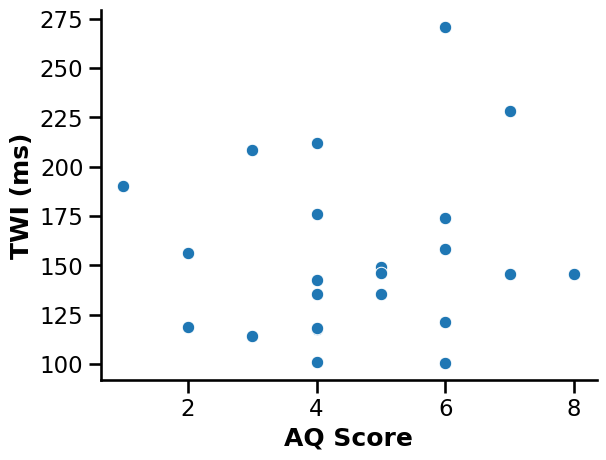

In [4]:
sns.set_context("talk")
sns.axes_style({"font.sans-serif": "Computer Modern Sans Serif"})

fig = sns.scatterplot(data=df, x="AQ_TOTAL", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})

plt.show()

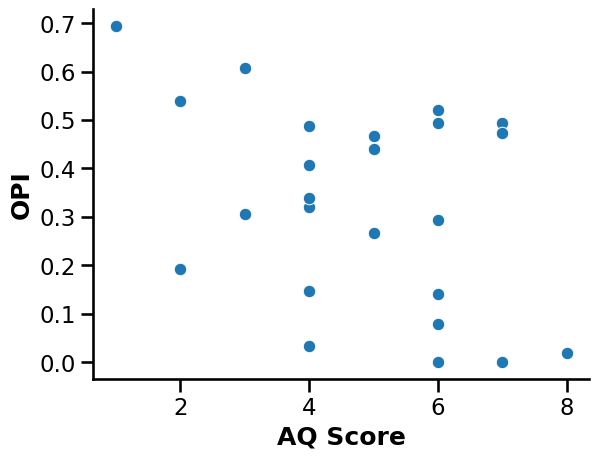

In [5]:
sns.set_context("talk")
fig = sns.scatterplot(data=df, x="AQ_TOTAL", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("OPI", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})
plt.show()

### AQ X LDL

In [45]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["AQ_TOTAL"],
        [
            "Avg_LDL",
            "LDL_250",
            "LDL_500",
            "LDL_1000",
            "LDL_2000",
            "LDL_4000",
            "LDL_8000",
        ],
    ],
    method="pearson",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,AQ_TOTAL,Avg_LDL,pearson,two-sided,23,0.505785,"[0.12, 0.76]",0.013808,4.491,0.718037
1,AQ_TOTAL,LDL_250,pearson,two-sided,23,0.357209,"[-0.06, 0.67]",0.094266,0.968,0.398274
2,AQ_TOTAL,LDL_500,pearson,two-sided,23,0.495890,"[0.11, 0.75]",0.016109,3.953,0.697404
3,AQ_TOTAL,LDL_1000,pearson,two-sided,23,0.553440,"[0.18, 0.79]",0.006153,8.839,0.810099
4,AQ_TOTAL,LDL_2000,pearson,two-sided,23,0.536433,"[0.16, 0.78]",0.008320,6.855,0.778857
5,AQ_TOTAL,LDL_4000,pearson,two-sided,23,0.446823,"[0.04, 0.73]",0.032557,2.225,0.590846
6,AQ_TOTAL,LDL_8000,pearson,two-sided,23,0.498476,"[0.11, 0.76]",0.015479,4.085,0.702836


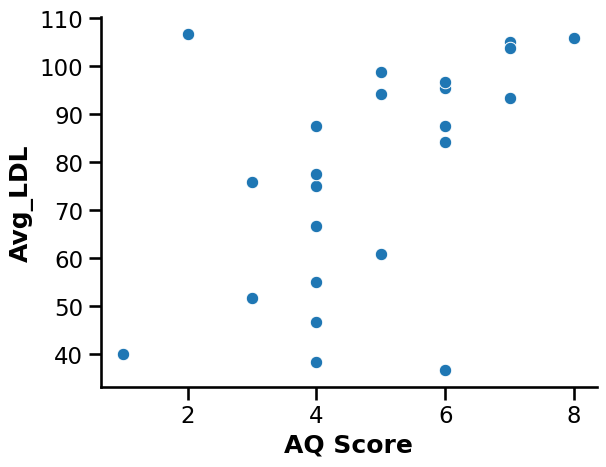

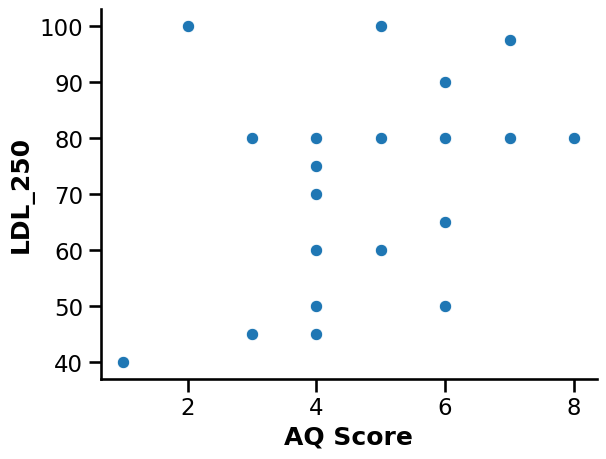

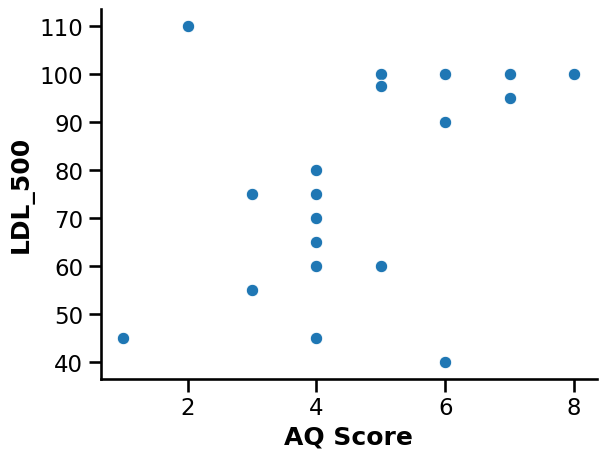

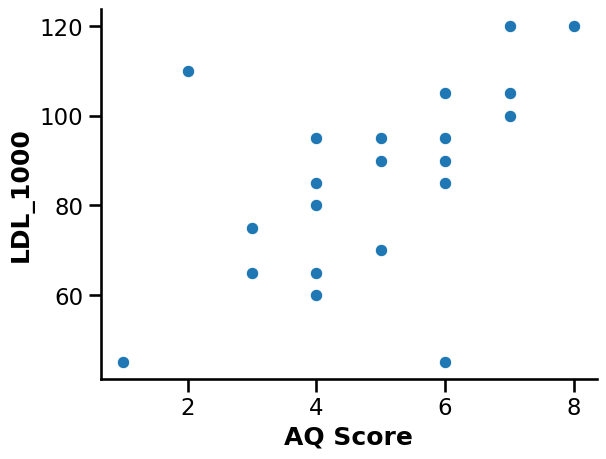

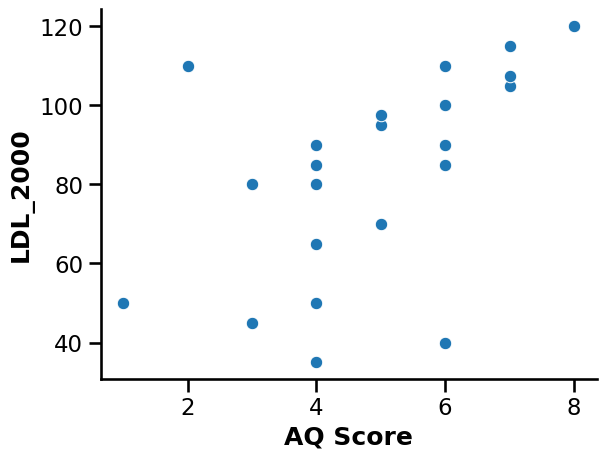

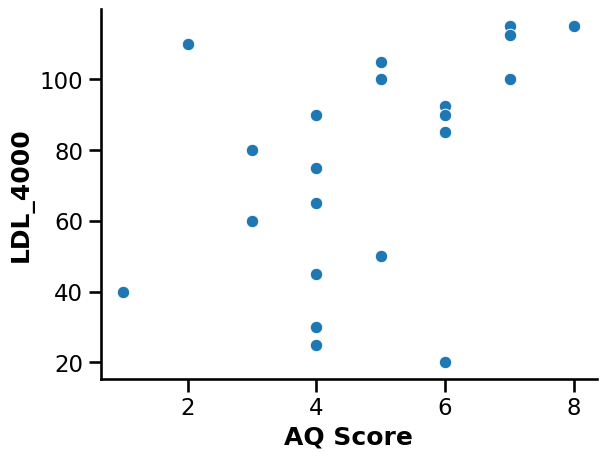

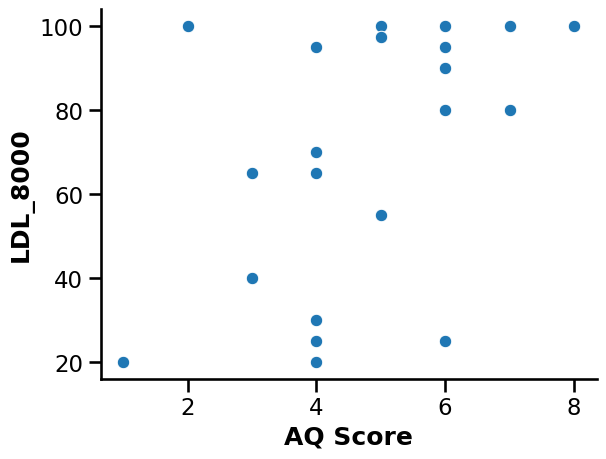

In [43]:
freqs = [
    "Avg_LDL",
    "LDL_250",
    "LDL_500",
    "LDL_1000",
    "LDL_2000",
    "LDL_4000",
    "LDL_8000",
]

for frequency in freqs:
    sns.set_context("talk")
    fig = sns.scatterplot(data=df, x="AQ_TOTAL", y=frequency)
    fig.spines["top"].set_visible(False)
    fig.spines["right"].set_visible(False)
    fig.set_ylabel(frequency, fontdict={"weight": "bold"})  # TODO qué unidad es esta?
    fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})
    plt.show()

### AQ X HL

In [42]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["AQ_TOTAL"],
        ["Avg_HL", "HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
    ],
    method="pearson",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,AQ_TOTAL,Avg_HL,pearson,two-sided,23,0.089426,"[-0.34, 0.48]",0.684910,0.279,0.068671
1,AQ_TOTAL,HL_250,pearson,two-sided,23,0.054397,"[-0.37, 0.46]",0.805286,0.266,0.056423
2,AQ_TOTAL,HL_500,pearson,two-sided,23,0.120045,"[-0.31, 0.51]",0.585348,0.298,0.084604
3,AQ_TOTAL,HL_1000,pearson,two-sided,23,-0.023615,"[-0.43, 0.39]",0.914825,0.26,0.050672
4,AQ_TOTAL,HL_2000,pearson,two-sided,23,0.247777,"[-0.18, 0.6]",0.254321,0.477,0.210221
5,AQ_TOTAL,HL_4000,pearson,two-sided,23,0.083441,"[-0.34, 0.48]",0.705049,0.277,0.066135
6,AQ_TOTAL,HL_8000,pearson,two-sided,23,-0.036146,"[-0.44, 0.38]",0.869938,0.262,0.052459


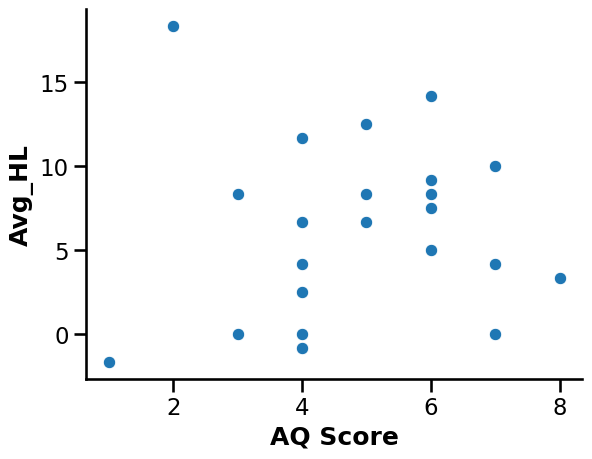

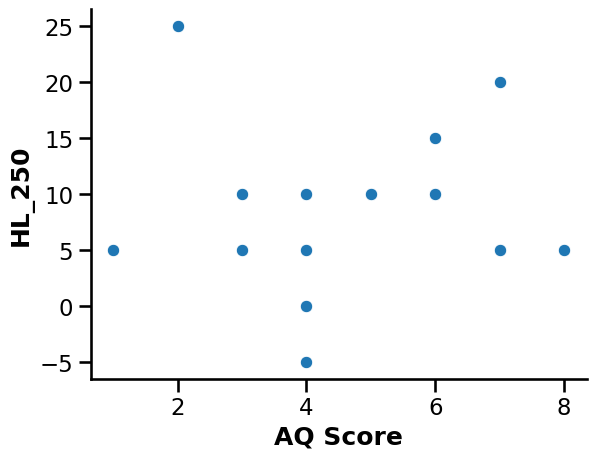

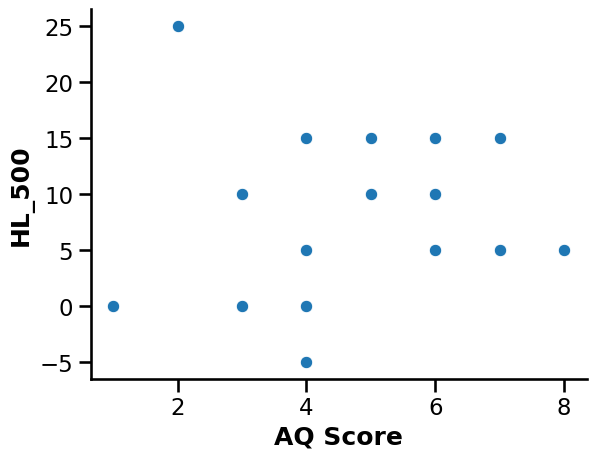

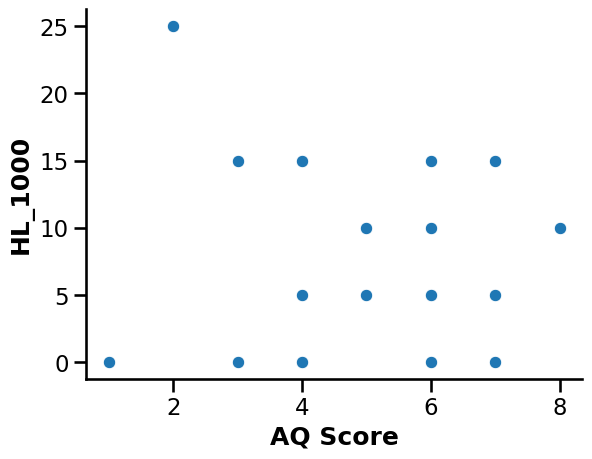

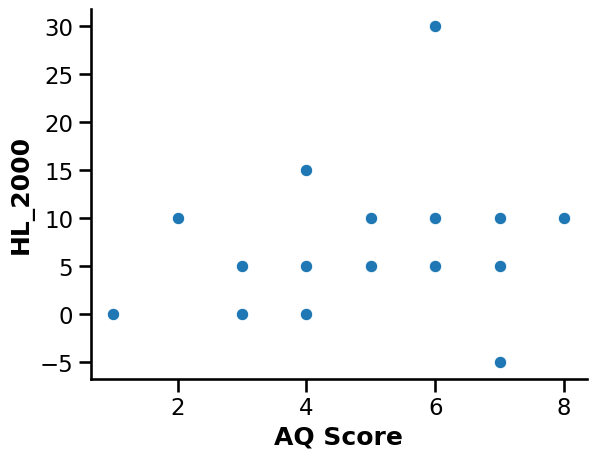

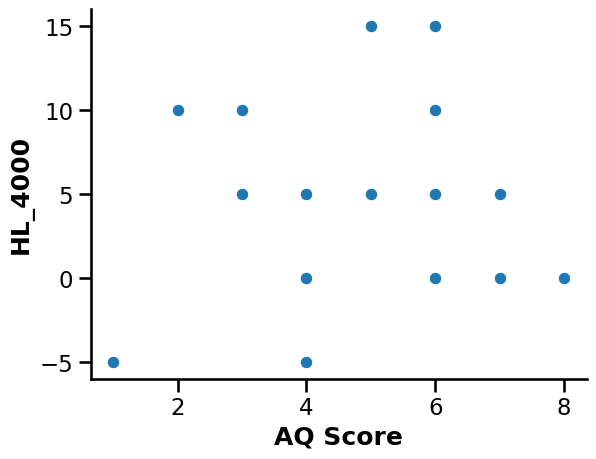

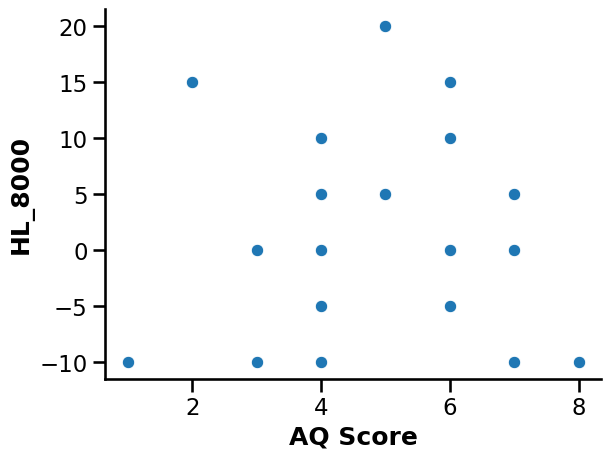

In [41]:
freqs = ["Avg_HL", "HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"]

for frequency in freqs:
    sns.set_context("talk")
    fig = sns.scatterplot(data=df, x="AQ_TOTAL", y=frequency)
    fig.spines["top"].set_visible(False)
    fig.spines["right"].set_visible(False)
    fig.set_ylabel(frequency, fontdict={"weight": "bold"})  # TODO qué unidad es esta?
    fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})
    plt.show()

### Group differences (autism criteria vs no autism criteria) and TWI and OPI

In [10]:
df.groupby("AQ_MC").size()

AQ_MC
False    17
True     12
dtype: int64

In [11]:
pg.pairwise_tests(data=df, dv="OPI", between="AQ_MC", effsize="cohen", correction=True)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,1.256714,16.666714,two-sided,0.226186,0.658,0.534931


/tmp/ipykernel_15484/55599752.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


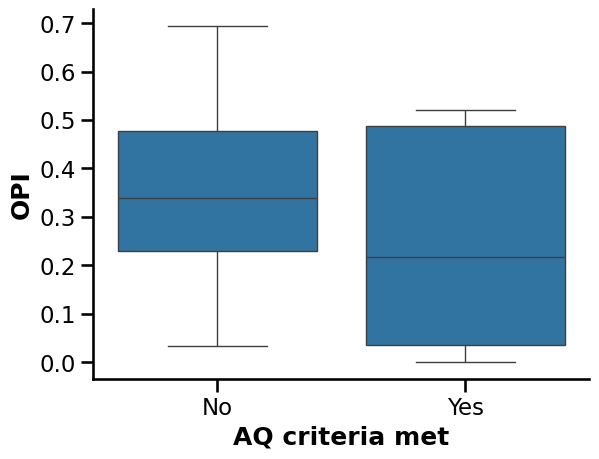

In [12]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="AQ_MC", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("OPI", fontdict={"weight": "bold"})
fig.set_xlabel("AQ criteria met", fontdict={"weight": "bold"})

plt.show()

In [13]:
pg.pairwise_tests(data=df, dv="TWI", between="AQ_MC", effsize="cohen", correction=True)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-0.909904,9.915385,two-sided,0.384458,0.525,-0.460721


/tmp/ipykernel_15484/2245876901.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


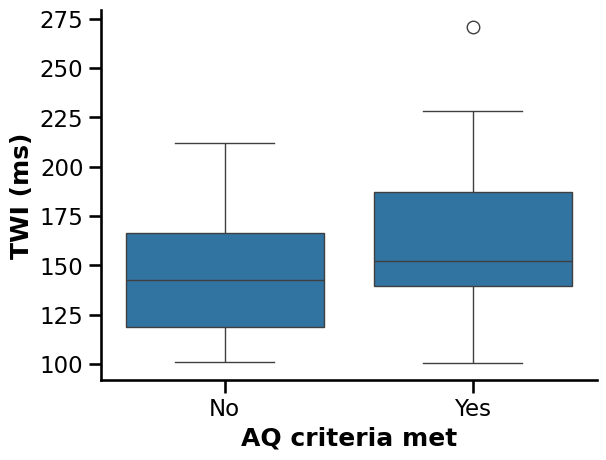

In [14]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="AQ_MC", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})
fig.set_xlabel("AQ criteria met", fontdict={"weight": "bold"})

plt.show()

### Group differences (autism criteria vs no autism criteria) and HL mean and LDL mean per frequency

#### LDL

t test for LDL_250


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-1.316796,20.762881,two-sided,0.202257,0.709,-0.520535


/tmp/ipykernel_15484/687525683.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


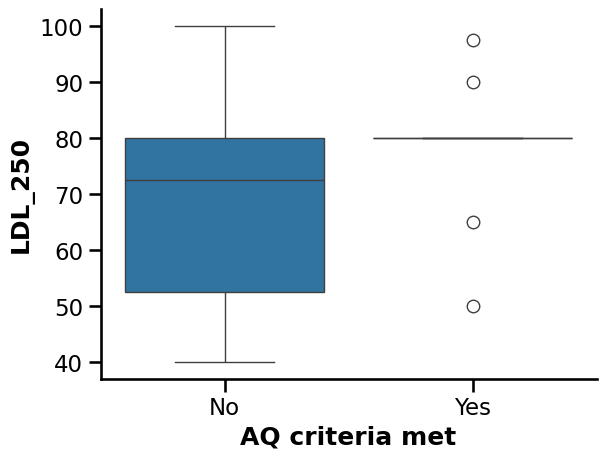

t test for LDL_500


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-2.413831,17.400323,two-sided,0.027063,2.674,-1.027933


/tmp/ipykernel_15484/687525683.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


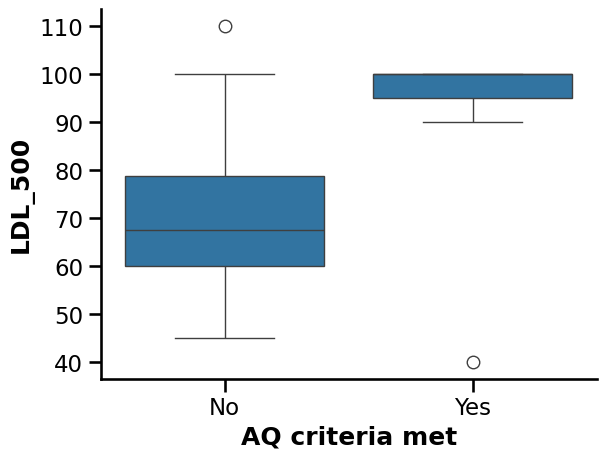

t test for LDL_1000


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-2.1383,14.071867,two-sided,0.050511,1.808,-0.967334


/tmp/ipykernel_15484/687525683.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


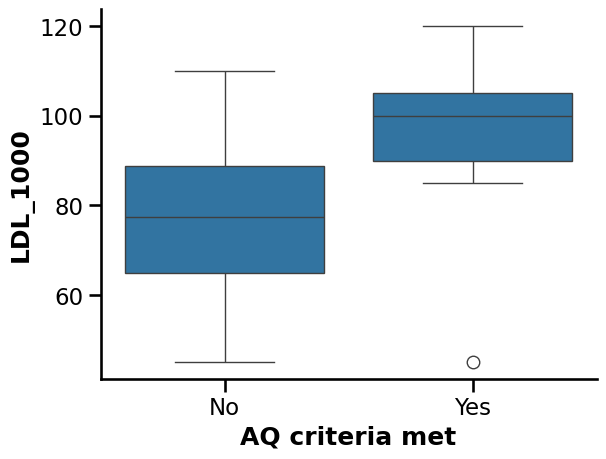

t test for LDL_2000


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-2.506861,16.57603,two-sided,0.022922,3.075,-1.083094


/tmp/ipykernel_15484/687525683.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


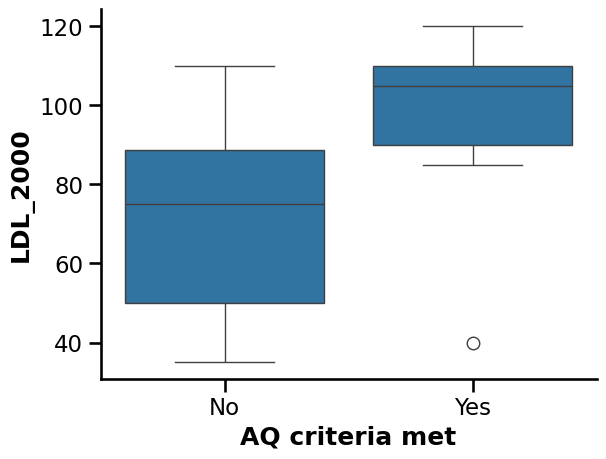

t test for LDL_4000


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-1.860172,16.482073,two-sided,0.080801,1.264,-0.805019


/tmp/ipykernel_15484/687525683.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


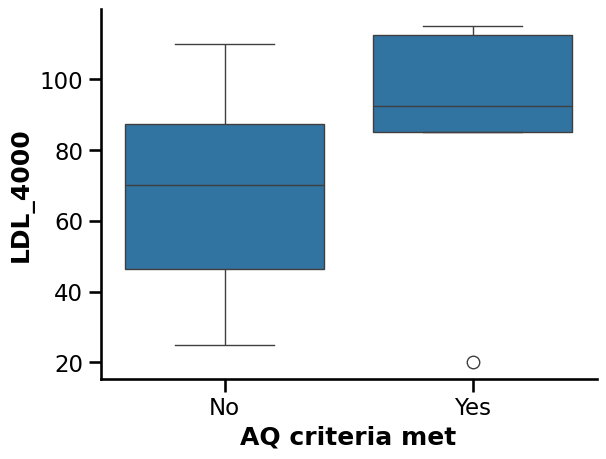

t test for LDL_8000


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-2.164415,19.813413,two-sided,0.042826,1.873,-0.880054


/tmp/ipykernel_15484/687525683.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


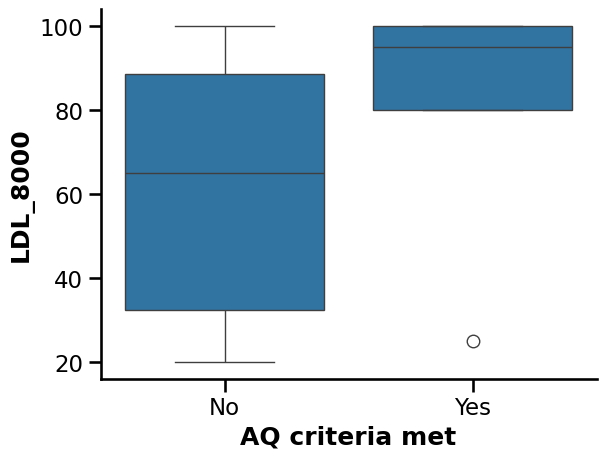

In [15]:
freqs = ["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(
        pg.pairwise_tests(
            data=df, dv=frequency, between="AQ_MC", correction=True, effsize="cohen"
        )
    )

    fig = sns.boxplot(data=df, x="AQ_MC", y=frequency)
    fig.spines["top"].set_visible(False)
    fig.spines["right"].set_visible(False)
    fig.set_xticklabels(["No", "Yes"])
    fig.set_ylabel(frequency, fontdict={"weight": "bold"})  # TODO qué unidad es esta?
    fig.set_xlabel("AQ criteria met", fontdict={"weight": "bold"})

    plt.show()

t test for Avg_LDL


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-2.191606,17.609731,two-sided,0.04211,1.945,-0.929859


/tmp/ipykernel_15484/3596764566.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


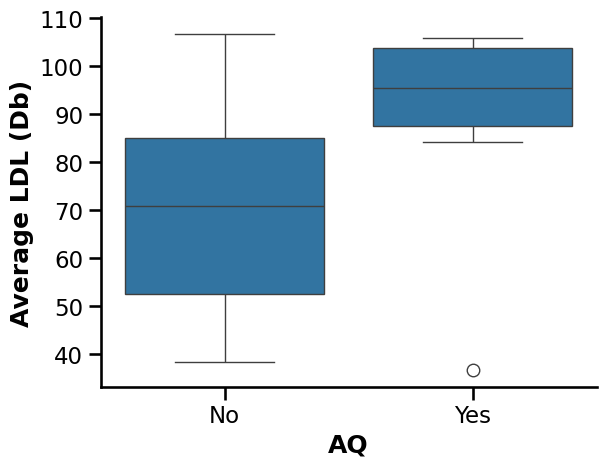

In [37]:
measurement = "Avg_LDL"
print("t test for %s" % (measurement))
display(
    pg.pairwise_tests(
        data=df, dv=measurement, between="AQ_MC", correction=True, effsize="cohen"
    )
)

sns.set_context("talk")
fig = sns.boxplot(data=df, x="AQ_MC", y=measurement)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel(
    "Average LDL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("AQ", fontdict={"weight": "bold"})

plt.show()

#### HL

t test for HL_250


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-1.140968,20.662933,two-sided,0.266935,0.611,-0.452911


/tmp/ipykernel_15484/1135377586.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


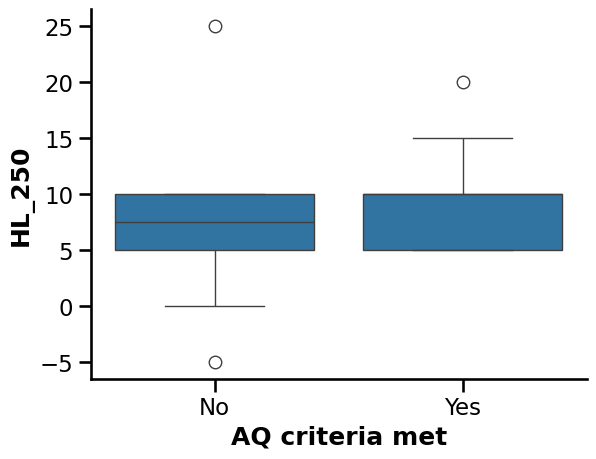

t test for HL_500


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-1.008196,20.878797,two-sided,0.324902,0.553,-0.384791


/tmp/ipykernel_15484/1135377586.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


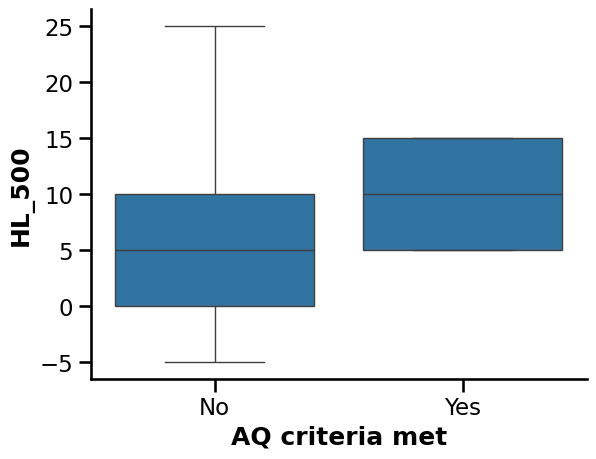

t test for HL_1000


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-0.027815,20.733808,two-sided,0.978075,0.385,-0.01101


/tmp/ipykernel_15484/1135377586.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


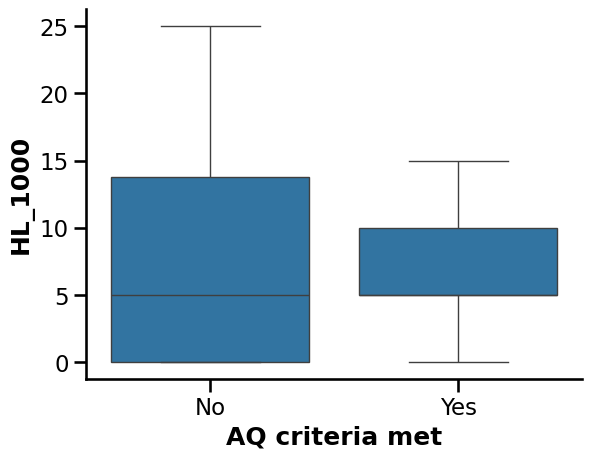

t test for HL_2000


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-1.276226,10.547508,two-sided,0.229261,0.684,-0.62731


/tmp/ipykernel_15484/1135377586.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


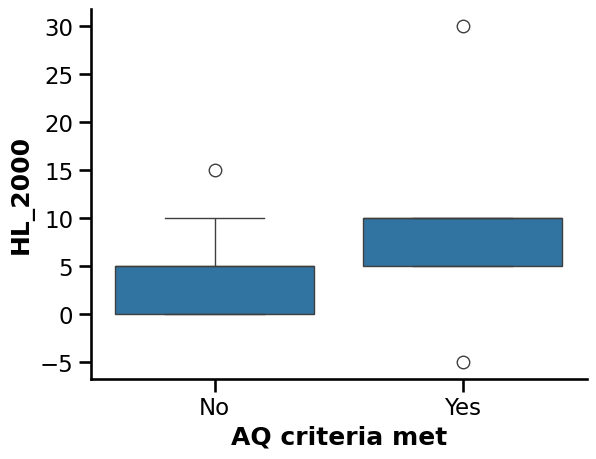

t test for HL_4000


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-0.448023,17.256667,two-sided,0.659711,0.414,-0.191273


/tmp/ipykernel_15484/1135377586.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


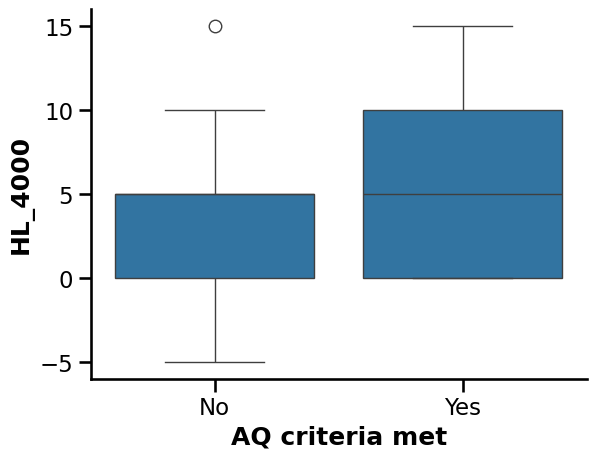

t test for HL_8000


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,0.611042,18.482721,two-sided,0.548614,0.44,0.255212


/tmp/ipykernel_15484/1135377586.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


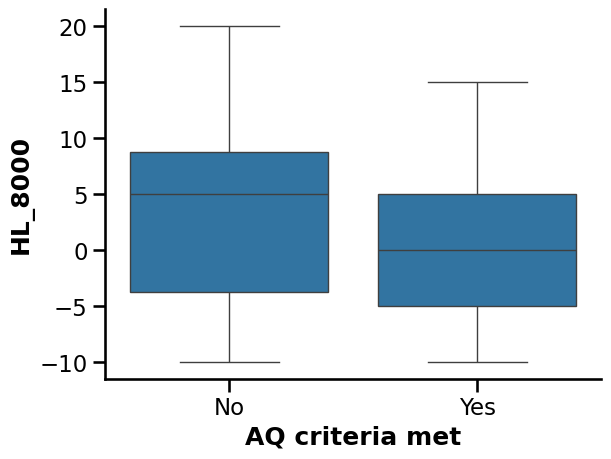

In [16]:
freqs = ["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(
        pg.pairwise_tests(
            data=df, dv=frequency, between="AQ_MC", correction=True, effsize="cohen"
        )
    )

    fig = sns.boxplot(data=df, x="AQ_MC", y=frequency)
    fig.spines["top"].set_visible(False)
    fig.spines["right"].set_visible(False)
    fig.set_xticklabels(["No", "Yes"])
    fig.set_ylabel(frequency, fontdict={"weight": "bold"})  # TODO qué unidad es esta?
    fig.set_xlabel("AQ criteria met", fontdict={"weight": "bold"})

    plt.show()

t test for Avg_HL


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-0.671818,20.786189,two-sided,0.509098,0.453,-0.265286


/tmp/ipykernel_15484/2075891886.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


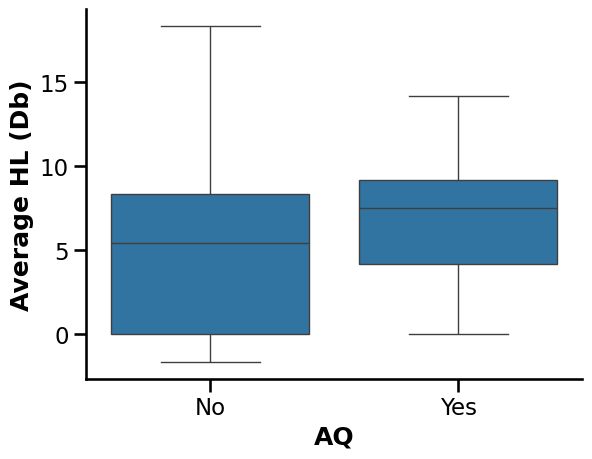

In [39]:
measurement = "Avg_HL"
print("t test for %s" % (measurement))
display(
    pg.pairwise_tests(
        data=df, dv=measurement, between="AQ_MC", correction=True, effsize="cohen"
    )
)

sns.set_context("talk")
fig = sns.boxplot(data=df, x="AQ_MC", y=measurement)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel(
    "Average HL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("AQ", fontdict={"weight": "bold"})

plt.show()

## Correlations between audiometry measurements and double flash illusion
- Average LDL across frequenciess x TWI (plot and correlation)
- Average LDL across frequenciess x OPI (plot and correlation)
- Average HL across frequenciess x TWI (plot and correlation)
- Average HL across frequencies x OPI (plot and correlation)

In [17]:
pg.pairwise_corr(
    data=df, columns=[["Avg_LDL", "Avg_HL"], ["TWI", "OPI"]], method="pearson"
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Avg_LDL,TWI,pearson,two-sided,19,0.183573,"[-0.3, 0.59]",0.451883,0.37,0.117557
1,Avg_LDL,OPI,pearson,two-sided,21,-0.137702,"[-0.54, 0.31]",0.551684,0.319,0.091466
2,Avg_HL,TWI,pearson,two-sided,19,0.186900,"[-0.29, 0.59]",0.443581,0.373,0.120183
3,Avg_HL,OPI,pearson,two-sided,21,0.103601,"[-0.34, 0.51]",0.654952,0.297,0.072817


,n,r,CI95%,p-val,BF10,power
pearson,19,0.183573,"[-0.3, 0.59]",0.451883,0.37,0.117557


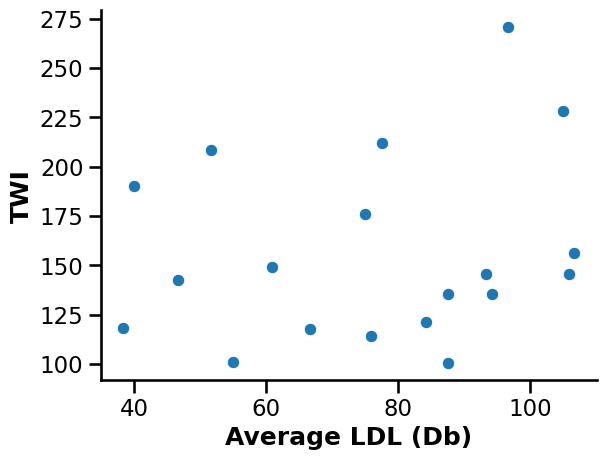

In [18]:
x = "Avg_LDL"
y = "TWI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data=df, x=x, y=y)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xlabel(
    "Average LDL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_ylabel("TWI", fontdict={"weight": "bold"})
plt.show()

,n,r,CI95%,p-val,BF10,power
pearson,21,-0.137702,"[-0.54, 0.31]",0.551684,0.319,0.091466


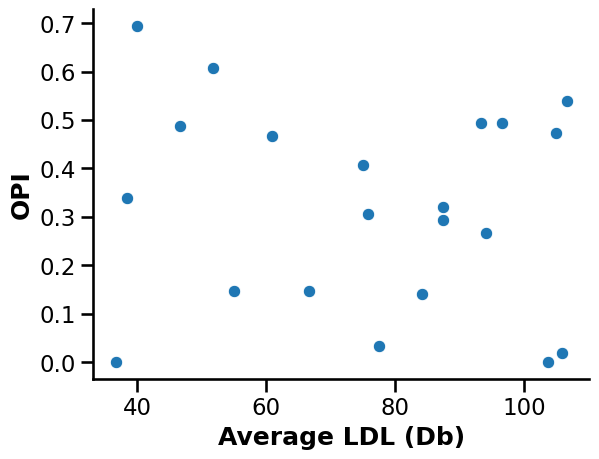

In [19]:
x = "Avg_LDL"
y = "OPI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data=df, x=x, y=y)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xlabel(
    "Average LDL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_ylabel("OPI", fontdict={"weight": "bold"})
plt.show()

### AvgHL most sensitive ear x OPI

,n,r,CI95%,p-val,BF10,power
pearson,19,0.1869,"[-0.29, 0.59]",0.443581,0.373,0.120183


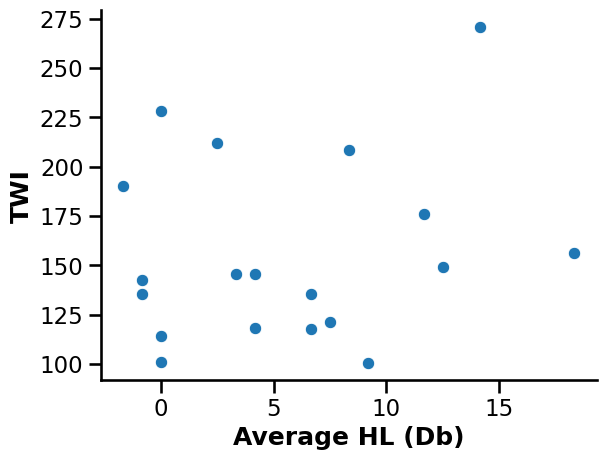

In [20]:
x = "Avg_HL"
y = "TWI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data=df, x=x, y=y)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xlabel(
    "Average HL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_ylabel("TWI", fontdict={"weight": "bold"})
plt.show()

,n,r,CI95%,p-val,BF10,power
pearson,21,0.103601,"[-0.34, 0.51]",0.654952,0.297,0.072817


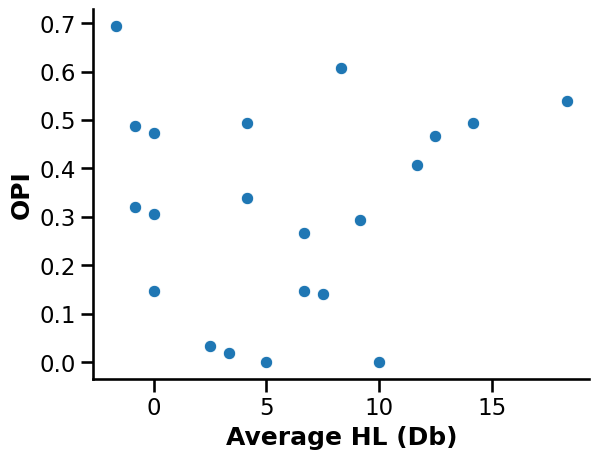

In [21]:
x = "Avg_HL"
y = "OPI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data=df, x=x, y=y)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xlabel(
    "Average HL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_ylabel("OPI", fontdict={"weight": "bold"})
plt.show()

### Preprocessing

In [26]:
df_sigmoid_fitted = pd.read_pickle("data/df_group_sigmoid_aq")

soas = [
    34.0,
    51.0,
    68.0,
    85.0,
    102.0,
    119.0,
    136.0,
    153.0,
    170.0,
    187.0,
    204.0,
    221.0,
    238.0,
    255.0,
    272.0,
]  # inter beep delay in experiment

In [27]:
df_sigmoid_fitted

,group,a,b,TWI,slope,illusion_count
0,False,15.072586,44.309339,145.671451,-17.496574,53.933333
1,True,13.276216,23.344511,155.019674,-13.824449,37.700000


In [28]:
# Generate the data for the plotsusing the fitted parameters
x = np.linspace(soas[0], soas[-1], 100)

index_of_control_group = 0
control = df_sigmoid_fitted.iloc[index_of_control_group].tolist()[1:-1]

index_of_HA_group = 1
ha = df_sigmoid_fitted.iloc[index_of_HA_group].tolist()[1:-1]

y_control = sig(x, *control)
y_ha = sig(x, *ha)

# Create a pandas DataFrame
df_control = pd.DataFrame({"x": x, "y": y_control})
df_ha = pd.DataFrame({"x": x, "y": y_ha})

### Plot

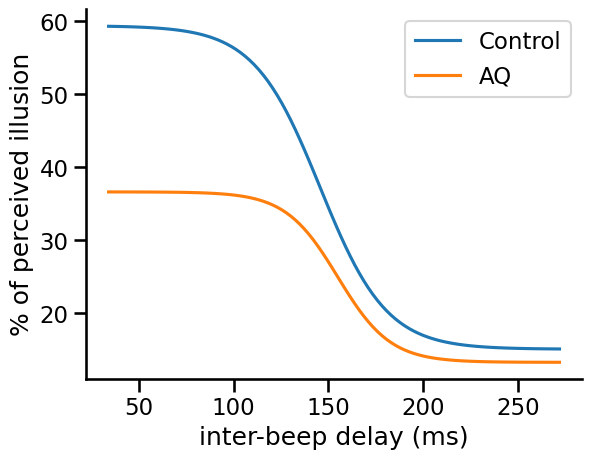

In [29]:
# Plot the sigmoid function
fig = sns.lineplot(data=df_control, x="x", y="y", label="Control")
fig = sns.lineplot(data=df_ha, x="x", y="y", label="AQ")

plt.xlabel("inter-beep delay (ms)")
plt.ylabel("% of perceived illusion")
plt.legend()
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
plt.show()